In [4]:
import tensorflow as tf

In [5]:
from tensorflow import keras

In [6]:
keras.__version__

'2.4.0'

In [7]:
tf.__version__

'2.3.0'

In [8]:
from keras.datasets import fashion_mnist

In [9]:
fashion_mnist=keras.datasets.fashion_mnist
(X_train_full,y_train_full),(X_test,y_test) = fashion_mnist.load_data()

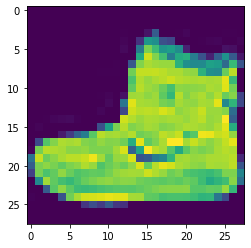

In [10]:
import matplotlib.pyplot as plt
plt.imshow(X_train_full[0])

In [11]:
y_train_full[0]

9

In [12]:
class_names=["T-Shirt/top","Trousers","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle_Boot"]
class_names[y_train_full[10]]

'T-Shirt/top'

In [13]:
#Data Normalizaton
X_train_n=X_train_full/255.0
X_test_n=X_test/255.0

In [14]:
#split the data into the train,validaton and test
X_valid,X_train =X_train_n[:5000],X_train_n[5000:]
y_valid,y_train=y_train_full[:5000],y_train_full[5000:]
X_test=X_test_n

In [15]:
X_valid[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [16]:
import numpy as np
np.random.seed(42)
tf.random.set_seed(42)

In [17]:
#create object model
model=keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300,activation="relu"))
model.add(keras.layers.Dense(100,activation="relu"))
model.add(keras.layers.Dense(10,activation="softmax"))

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [19]:
import pydot

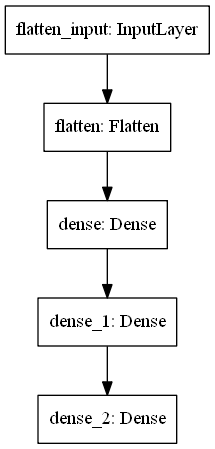

In [20]:
from tensorflow.keras.utils import plot_model
plot_model(model)

In [21]:
weights,biases=model.layers[1].get_weights()

In [22]:
weights

array([[ 0.02448617, -0.00877795, -0.02189048, ..., -0.02766046,
         0.03859074, -0.06889391],
       [ 0.00476504, -0.03105379, -0.0586676 , ...,  0.00602964,
        -0.02763776, -0.04165364],
       [-0.06189284, -0.06901957,  0.07102345, ..., -0.04238207,
         0.07121518, -0.07331658],
       ...,
       [-0.03048757,  0.02155137, -0.05400612, ..., -0.00113463,
         0.00228987,  0.05581069],
       [ 0.07061854, -0.06960931,  0.07038955, ..., -0.00384101,
         0.00034875,  0.02878492],
       [-0.06022581,  0.01577859, -0.02585464, ..., -0.00527829,
         0.00272203, -0.06793761]], dtype=float32)

In [23]:
weights.shape

(784, 300)

In [24]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [25]:
biases.shape

(300,)

In [26]:
#compiling and training the model
model.compile(loss="sparse_categorical_crossentropy",optimizer="sgd",metrics=["accuracy"])

In [27]:
model_history=model.fit(X_train,y_train,epochs=30,validation_data=(X_valid,y_valid))

Epoch 1/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.7239 - accuracy: 0.7643 - val_loss: 0.5219 - val_accuracy: 0.8206
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4842 - accuracy: 0.8320 - val_loss: 0.4352 - val_accuracy: 0.8524
Epoch 3/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4389 - accuracy: 0.8456 - val_loss: 0.5350 - val_accuracy: 0.7984
Epoch 4/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4121 - accuracy: 0.8563 - val_loss: 0.3919 - val_accuracy: 0.8648
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3937 - accuracy: 0.8619 - val_loss: 0.3751 - val_accuracy: 0.8688
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3749 - accuracy: 0.8677 - val_loss: 0.3719 - val_accuracy: 0.8726
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3631 - accuracy: 0.8711 - val_loss: 0.3622 - val_accuracy:

In [28]:
model_history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [29]:
model_history.history

{'loss': [0.7238965630531311,
  0.4841584265232086,
  0.43885383009910583,
  0.4121268391609192,
  0.39366549253463745,
  0.3749418556690216,
  0.3630700409412384,
  0.35156887769699097,
  0.3411632776260376,
  0.3319751024246216,
  0.3240024745464325,
  0.3147030770778656,
  0.30797964334487915,
  0.3019355833530426,
  0.29456961154937744,
  0.2888883650302887,
  0.2839215397834778,
  0.2776336669921875,
  0.272808313369751,
  0.2672886848449707,
  0.26240432262420654,
  0.25757795572280884,
  0.25364652276039124,
  0.24834051728248596,
  0.24411514401435852,
  0.24049851298332214,
  0.23627226054668427,
  0.23259715735912323,
  0.22845612466335297,
  0.22509993612766266],
 'accuracy': [0.7643091082572937,
  0.8320000171661377,
  0.8456000089645386,
  0.8563454747200012,
  0.8619090914726257,
  0.8676727414131165,
  0.8711272478103638,
  0.8746363520622253,
  0.8791999816894531,
  0.8821272850036621,
  0.8838727474212646,
  0.8869272470474243,
  0.8892182111740112,
  0.891563653945922

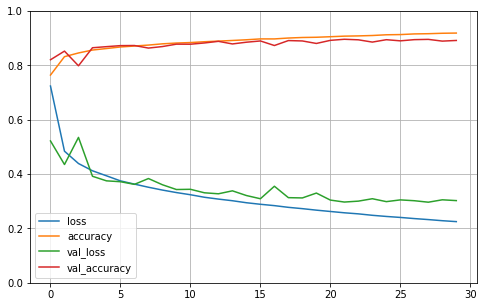

In [30]:
import pandas as pd
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()


In [31]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3362 - accuracy: 0.8820


[0.3362337052822113, 0.8820000290870667]

In [32]:
X_new=X_test[:3]

In [33]:
y_proba=model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.03, 0.  , 0.96],
       [0.  , 0.  , 0.99, 0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [34]:
y_pred=model.predict_classes(X_new)
y_pred

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([9, 2, 1], dtype=int64)

In [35]:
np.array(class_names)[y_pred]

array(['Ankle_Boot', 'Pullover', 'Trousers'], dtype='<U11')

AxesImage(54,36;334.8x217.44)


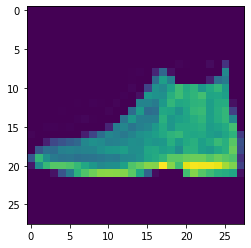

In [36]:
print(plt.imshow(X_test[0]))


AxesImage(54,36;334.8x217.44)


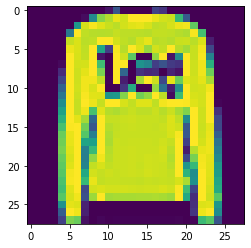

In [37]:
print(plt.imshow(X_test[1]))

AxesImage(54,36;334.8x217.44)


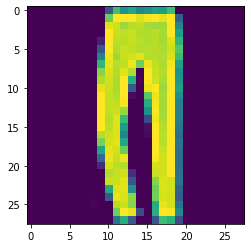

In [38]:
print(plt.imshow(X_test[2]))